Azure climate change analysis

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set
from sklearn.linear_model import LinearRegression


In [6]:
data = pd.read_csv("mean in usa.csv" ,delimiter=',')
#years, mean = np.loadtxt('', delimiter=',', usecols=(0, 1), unpack=True)

In [7]:
data.head()

,Year,Annual_Mean,Lowess(5)
0,1880,-0.35,-0.11
1,1881,0.11,-0.21
2,1882,0.06,-0.29
3,1883,-0.80,-0.37
4,1884,-0.57,-0.44


In [10]:
data["Year"].head()

0    1880
1    1881
2    1882
3    1883
4    1884
Name: Year, dtype: int64

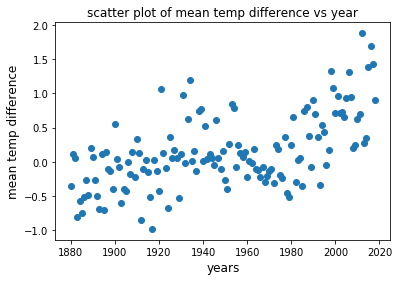

In [11]:
plt.scatter(data["Year"], data["Annual_Mean"])
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

Performing LinearRegression

In [14]:

m,b = np.polyfit(data["Year"],data["Annual_Mean"],1)

def fxn(x):
    return m*x+b

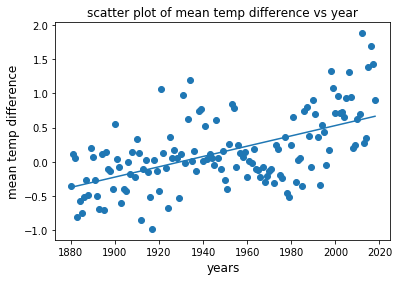

 y = 0.007529514276777346 * x + -14.528404620403082


In [15]:
plt.scatter(data["Year"], data["Annual_Mean"])
plt.plot(data["Year"], fxn(data["Year"]))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

Fitting with Sklearn

In [16]:

model = LinearRegression(fit_intercept=True)

# Fit the model
model.fit(data["Year"][:, np.newaxis], data["Annual_Mean"])
mean_predicted = model.predict(data["Year"][:, np.newaxis])


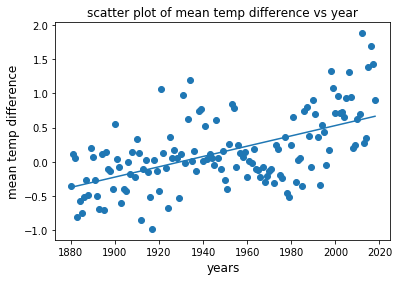

 y = 0.0075295142767773365 * x + -14.528404620403057


In [17]:

# Plotting 
plt.scatter(data["Year"], data["Annual_Mean"])
plt.plot(data["Year"],mean_predicted )
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))





/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


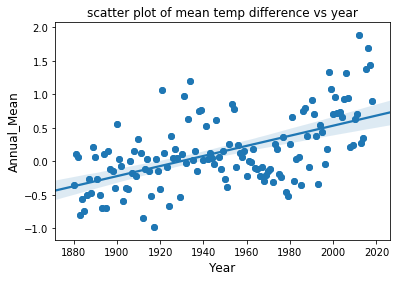

In [19]:
plt.scatter(data["Year"], data["Annual_Mean"])
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(data["Year"], data["Annual_Mean"])
plt.show()